# Introduction to Altair

[Altair](https://altair-viz.github.io/) is a new data visualization library that is based loosely on the grammar of graphics. It allows us to rapidly produce data-dense graphics of multivariate data.

In [1]:
from altair import *

In [2]:
import pandas as pd
data = pd.read_csv("/data/harris.csv")

## Altair Basics

Let's make a scatterplot of beginning salary (`Bsal`) vs. 1977 salary (`Sal77`) of the Harris employees, where each point is colored according to their gender (`Sex`).

Every Altair command starts with `Chart(your_data_frame)`. Then, you specify two things:
- a mark (a.k.a. geometric object)
- encoding channels (a.k.a. aesthetic mappings)

In [5]:
data.head()

,Bsal,Sal77,Sex,Senior,Age,Educ,Exper
0,5040,12420,Male,96,329,15,14.0
1,6300,12060,Male,82,357,15,72.0
2,6000,15120,Male,67,315,15,35.5
3,6000,16320,Male,97,354,12,24.0
4,6000,12300,Male,66,351,12,56.0


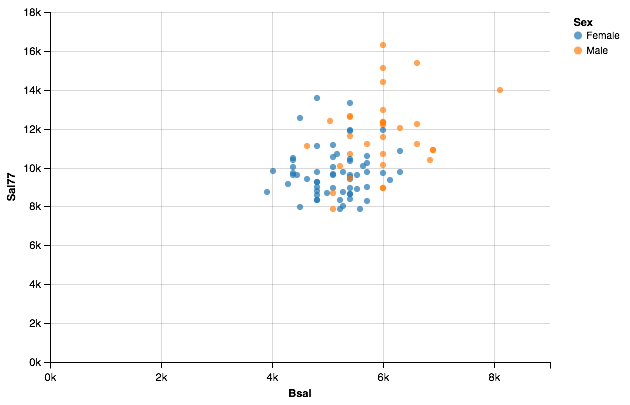

In [6]:
Chart(data).mark_circle().encode(
    x="Bsal",
    y="Sal77",
    color="Sex"
)

We can facet by a variable by mapping it to either the `row` or `column` aesthetic.

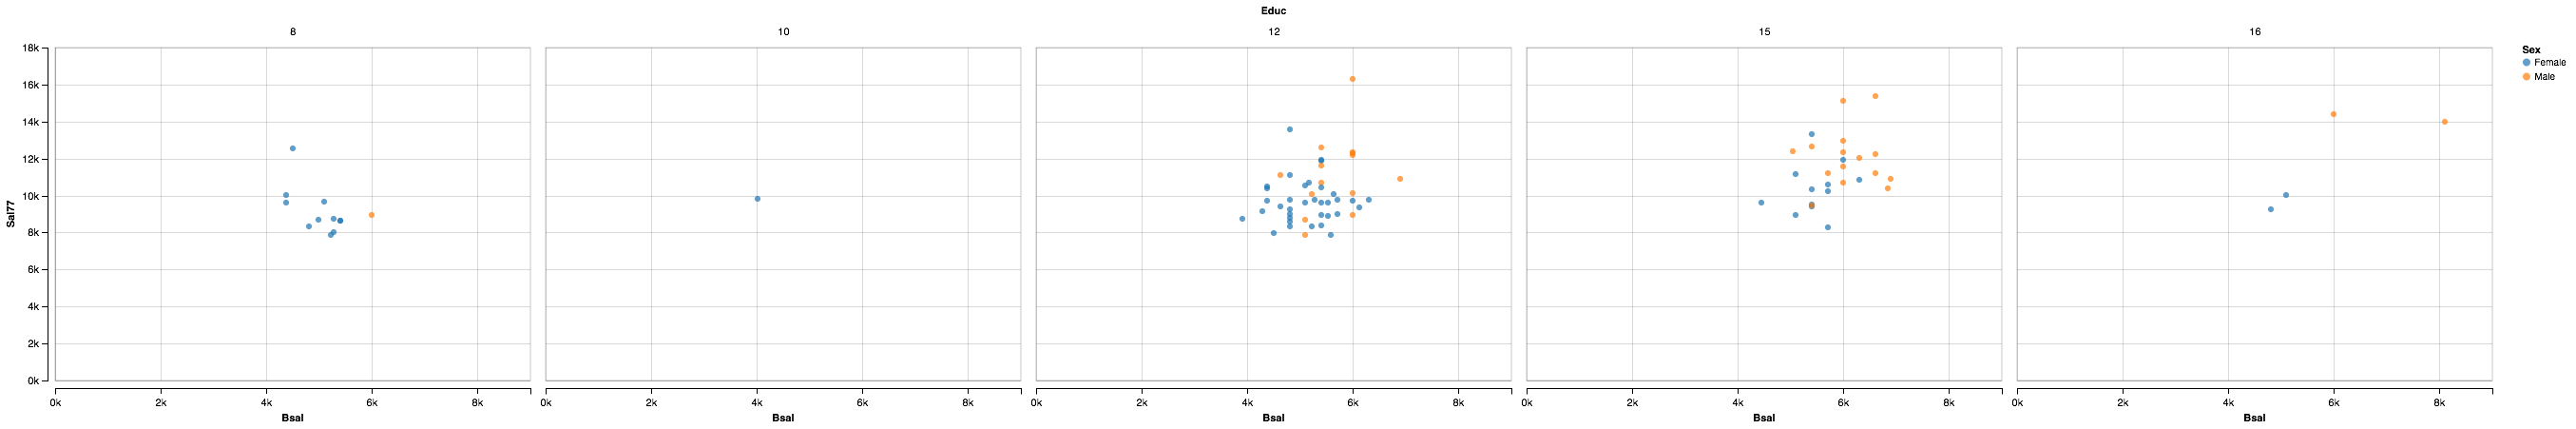

In [7]:
Chart(data).mark_circle().encode(
    x="Bsal",
    y="Sal77",
    color="Sex",
    column="Educ"
)

## Customizing Plots

In the plots above, we mapped variables to aesthetics by simply specifying the column names. While convenient, this does not allow us to customize the aesthetics. To customize an aesthetic, we have to use the verbose method of specifying the aesthetic.

Each aesthetic has an associated class. For example, the `x` aesthetic is associated with the `X` class, and the `color` aesthetic is associated with the `Color` class. We can pass customizations for an aesthetic into the constructor for its associated class. 

For example, suppose we want to change the x-axis limits to go from 2000 to 9000, and we want the tick labels to print the number 4000 instead of 4k. Here's how we would do it in Altair. (Note that we are using [D3 format strings](https://github.com/d3/d3-format/blob/master/README.md#formatPrefix) to specify the axis format.)

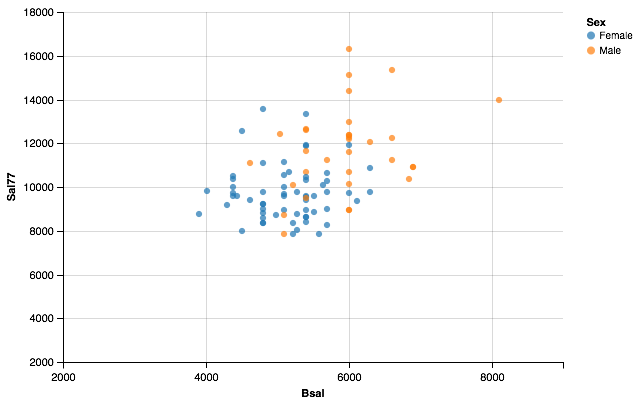

In [11]:
Chart(data).mark_circle().encode(
    x=X("Bsal",scale=Scale(domain=(2000, 9000)), axis=Axis(format="f")),
    y=Y("Sal77", scale=Scale(domain=(2000,18000)), axis=Axis(format="f")),
    color="Sex"
)

**Exercise.** Make a scatterplot of beginning salary and 1977 salary, but color the points according to education level. By default, Altair treats `Educ` as a quantitative variable. (Why?) Customize the color aesthetic so that Altair treats `Educ` as a nominal (a.k.a. categorical) variable. How does the plot change?

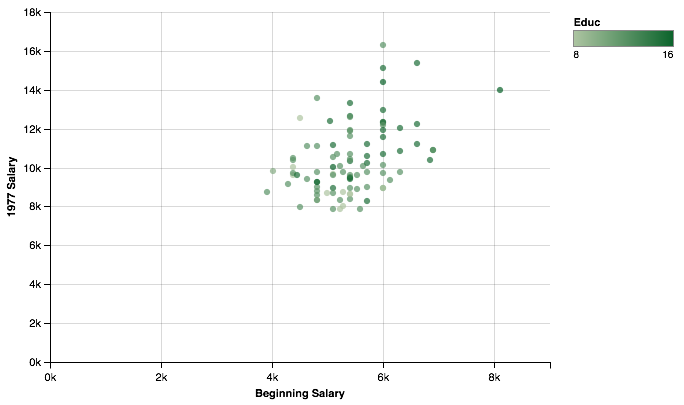

In [28]:
## Educ as quantitative
Chart(data).mark_circle().encode(
    x=X("Bsal", title="Beginning Salary"),
    y=Y("Sal77", title="1977 Salary"),
    color="Educ:Q")

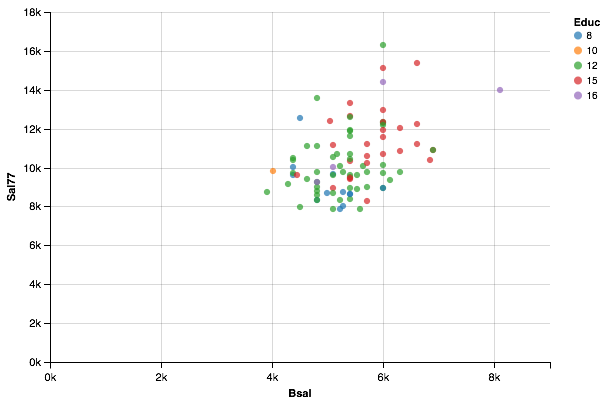

In [26]:
## Educ as categorical
Chart(data).mark_circle().encode(
    x="Bsal",
    y="Sal77",
    color="Educ:N")